In [2]:
import os
import pandas as pd
from glob import glob
import random
import shutil # 파일 이동에 사용
import natsort as nt # 파일 sort에 사용
import matplotlib.pyplot as plt
import numpy as np

In [3]:
path_train = os.path.join(os.getcwd(), '이미지 클래스 폴더 경로')

path_cate_csv = os.path.join(os.getcwd(), '이미지 라벨.csv 경로')

df_cate = pd.read_csv(path_cate_csv)

df_cate.head()

,landmark_id,landmark_name
0,0,금천구청
1,1,두리랜드
2,2,이대원 장군묘
3,3,성공회대학교
4,4,송상현공 동상


In [4]:
df_dict = dict(df_cate.values[:,::-1]) # 데이터 프레임 안의 내용 dict로 받음
df_dict

{'금천구청': 0,
 '두리랜드': 1,
 '이대원 장군묘': 2,
 '성공회대학교': 3,
 '송상현공 동상': 4,
 '진위향교': 5,
 '추계예술대학교': 6,
 '계명대학교 행소박물관': 7,
 '태조 이성계상': 8,
 '마포 농수산물 시장': 9,
 '대구서구문화회관': 10,
 '쉐라톤 서울 디큐브 시티 호텔': 11,
 '구리시 교문도서관': 12,
 '의정부시 상설 야외무대': 13,
 '연지어린이공원': 14,
 '종로성당': 15,
 '대화 레포츠공원 체육시설': 16,
 '하나로장로교회': 17,
 '서울대학교 관악캠퍼스': 18,
 '서울광장': 19,
 '영진종합사회복지관': 20,
 '한국항공대학교 우주박물관': 21,
 '좌동재래시장': 22,
 'NC백화점 안산고잔점': 23,
 '청계천발원지': 24,
 '김포 독립운동 기념관': 25,
 '명동성당': 26,
 '경춘선숲길': 27,
 '유니온타워': 28,
 '황희선생 유적지': 29,
 '신포국제시장': 30,
 '안중근의사 기념관': 31,
 '의정부 정보도서관': 32,
 '인천 계양도서관': 33,
 '와우정사': 34,
 '덕소 도서관': 35,
 '은평역사한옥박물관': 36,
 '한중원 쉼터': 37,
 '무등경기장 야구장': 38,
 '한국지역난방공사 경기지사': 39,
 '절두산 순교 성지': 40,
 '안양문화 예술재단': 41,
 '문묘': 42,
 '뚝섬한강공원': 43,
 '관음정사': 44,
 '농업 박물관': 45,
 '육탄 이희복용사 동상': 46,
 '망원시장': 47,
 '의정부 성당': 48,
 '연수어린이도서관': 49,
 '하남 시립 나룰도서관': 50,
 '은평 한옥마을': 51,
 '병암서원': 52,
 '영동대교': 53,
 '스타필드 고양': 54,
 '신촌세브란스병원': 55,
 '권율장군 대첩비': 56,
 '구로구청': 57,
 '백운포체육공원': 58,
 '서오릉': 59,
 '성현교회': 60,
 '배재학당역사박물관': 

In [14]:
path_train_new = os.path.join(os.getcwd(), '이미지 클래스 폴더 경로')

class_list = nt.natsorted(os.listdir(path_train_new))

class_id_list = []
image_len_list = []
for i in range(len(class_list)):
    path_train_image = os.path.join(path_train_new, class_list[i])
    image_list = os.listdir(path_train_image)
    class_id_list.append(i)
    image_len_list.append(len(image_list))

In [24]:
image_len_list

[83,
 82,
 92,
 76,
 78,
 86,
 93,
 85,
 82,
 92,
 85,
 76,
 88,
 80,
 82,
 85,
 82,
 79,
 80,
 84,
 85,
 82,
 75,
 89,
 76,
 79,
 85,
 88,
 81,
 90,
 87,
 80,
 82,
 92,
 88,
 86,
 88,
 89,
 86,
 90,
 81,
 88,
 87,
 81,
 85,
 82,
 86,
 94,
 86,
 84,
 76,
 87,
 83,
 80,
 91,
 85,
 80,
 76,
 80,
 78,
 83,
 78,
 85,
 91,
 70,
 81,
 90,
 75,
 84,
 82,
 84,
 92,
 84,
 78,
 82,
 80,
 94,
 80,
 89,
 84,
 85,
 84,
 91,
 84,
 93,
 81,
 84,
 85,
 83,
 74,
 85,
 89,
 80,
 78,
 82,
 76,
 88,
 84,
 90,
 78,
 88,
 85,
 89,
 82,
 86,
 74,
 84,
 88,
 101,
 85,
 91,
 86,
 80,
 85,
 85,
 84,
 75,
 87,
 84,
 82,
 88,
 89,
 82,
 90,
 86,
 85,
 88,
 88,
 86,
 92,
 78,
 76,
 74,
 83,
 83,
 89,
 81,
 80,
 87,
 88,
 85,
 93,
 83,
 90,
 90,
 76,
 79,
 92,
 81,
 79,
 82,
 83,
 80,
 88,
 85,
 80,
 85,
 75,
 79,
 92,
 94,
 89,
 72,
 80,
 81,
 72,
 86,
 90,
 83,
 80,
 86,
 80,
 81,
 89,
 88,
 79,
 90,
 86,
 92,
 80,
 92,
 88,
 86,
 91,
 91,
 80,
 93,
 82,
 82,
 81,
 80,
 88,
 91,
 86,
 85,
 82,
 77,
 83,
 79,
 87,

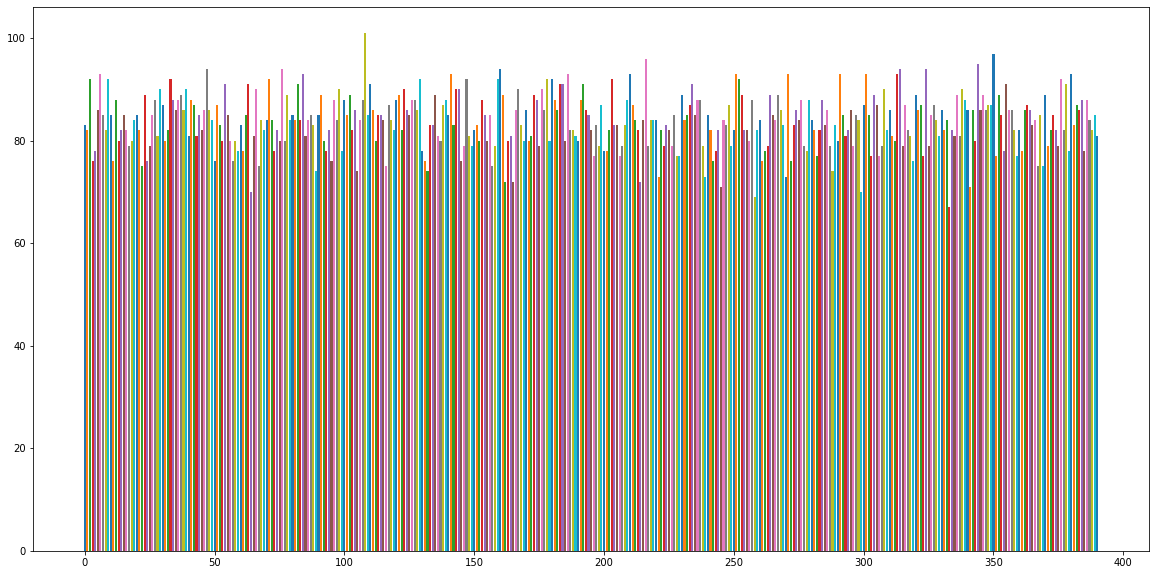

In [15]:
cmap = plt.cm.tab10
colors = cmap(np.arange(len(class_id_list)) % cmap.N)
plt.figure(figsize=(20,10))
plt.bar(class_id_list,image_len_list, color=colors)
plt.show()